# IAU-PROJEKT, STAHOVEC a VIEST
------------------------------------------------
Projekt začína základnými importmi pre knižnice, ktoré budeme v projekte používať.

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
import statsmodels.stats as sm_stats

In [95]:
sns.set_theme(style="whitegrid", palette="viridis")
sns.set_palette("viridis")

Hneď na začiatok si **načítame dáta** zo súboru funkciou **read_csv()**
Následne vykonáme prvú "čistiacu" operáciu, v ktorej vymažeme prvý stĺpec, v ktorom
je očíslovanie stĺpcov, ktoré je pre našu analýzu zbytočné.

In [136]:
data_labor = pd.read_csv("dataset/labor.csv", sep="\t")
# del data["Unnamed: 0"]
data_labor = data_labor.iloc[:, 1:]
data_labor

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,yes,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divoced,0.0,55.43592,-2.73558,51.62366,3.34206
1,yes,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divoced,0.0,45.34617,81.56533,61.59374,5.78180
2,no,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divoced,0.0,29.29190,151.24191,47.96329,4.55230
3,no,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divoced,1.0,60.47398,83.89451,57.47174,7.17271
4,yes,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divoced,1.0,41.10299,107.22958,34.25820,6.93681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,Y,5.17020,5.61728,0.60775,5.35296,4.59956,5.52802,425-94-7489,Ryan Pineda,3.86179,75.76127,single,0.0,38.06206,60.90926,41.67857,4.57350
9967,no,5.70666,8.82840,2.35342,5.20966,3.73586,6.25482,375-27-0860,Travis Brown,5.03429,85.17538,widowed,1.0,48.35999,106.88451,23.49894,7.00122
9968,Y,6.45549,6.83179,0.62415,7.84688,4.52864,5.57765,300-91-9095,Michelle Watson,6.38035,79.13200,married,1.0,28.09339,75.74349,23.52645,6.94466
9969,Y,4.81311,7.26178,0.84372,6.76794,7.54696,7.07142,691-20-7896,Ryan Hahn,5.27933,79.64629,married,0.0,56.63966,52.15898,31.12380,4.98399


V nasledujúcej bunke sme **nahradili chýbajúce hodnoty** priemerom v danom stĺpci.
Túto operáciu sme mohli vykonať z dôvodu, že všetky **chýbajúce hodnoty** boli iba v tých
stĺpcoch, ktoré obsahujú **numerické hodnoty** (float64).

In [137]:
data_labor.isna().sum()

smoker           0
hbver           31
erytrocyty      32
alt             30
leukocyty       30
etytr           31
hemoglobin      31
ssn              0
name             0
trombocyty      30
alp             30
relationship     0
indicator        0
er-cv           30
weight           0
ast             30
hematokrit      30
dtype: int64

In [138]:
data_labor = data_labor.fillna(data_labor.mean())
data_labor

/tmp/ipykernel_18176/3025875362.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_labor = data_labor.fillna(data_labor.mean())


,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,yes,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divoced,0.0,55.43592,-2.73558,51.62366,3.34206
1,yes,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divoced,0.0,45.34617,81.56533,61.59374,5.78180
2,no,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divoced,0.0,29.29190,151.24191,47.96329,4.55230
3,no,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divoced,1.0,60.47398,83.89451,57.47174,7.17271
4,yes,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divoced,1.0,41.10299,107.22958,34.25820,6.93681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,Y,5.17020,5.61728,0.60775,5.35296,4.59956,5.52802,425-94-7489,Ryan Pineda,3.86179,75.76127,single,0.0,38.06206,60.90926,41.67857,4.57350
9967,no,5.70666,8.82840,2.35342,5.20966,3.73586,6.25482,375-27-0860,Travis Brown,5.03429,85.17538,widowed,1.0,48.35999,106.88451,23.49894,7.00122
9968,Y,6.45549,6.83179,0.62415,7.84688,4.52864,5.57765,300-91-9095,Michelle Watson,6.38035,79.13200,married,1.0,28.09339,75.74349,23.52645,6.94466
9969,Y,4.81311,7.26178,0.84372,6.76794,7.54696,7.07142,691-20-7896,Ryan Hahn,5.27933,79.64629,married,0.0,56.63966,52.15898,31.12380,4.98399


In [133]:
data_labor.describe()

,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,indicator,er-cv,weight,ast,hematokrit
count,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000
mean,6.071692,6.842049,1.120983,6.064355,5.318564,6.062952,6.084395,54.622262,0.643165,51.121580,70.305658,50.459989,6.461410
std,1.000834,1.460087,2.019724,1.009118,1.393256,1.741981,1.006202,26.103211,0.479090,12.856008,34.976941,12.771838,1.617865
min,2.148000,1.103640,0.000000,2.239400,0.548790,0.000000,2.587100,0.000000,0.000000,0.000000,-54.061950,0.000000,1.991860
25%,5.401305,6.037930,0.563945,5.393100,4.444160,4.780500,5.407585,31.460750,0.000000,42.546015,46.128010,41.770680,5.127505
50%,6.071692,7.004430,0.780950,6.071080,5.120390,6.115310,6.084395,58.533820,1.000000,50.954600,70.793900,50.618370,6.753050
75%,6.742105,7.807580,1.166560,6.730190,6.019805,7.378890,6.765420,78.880725,1.000000,59.861495,94.071090,59.039665,7.490275
max,10.532500,12.769020,100.000000,9.767710,10.673750,11.720370,9.774760,100.000000,1.000000,100.000000,194.734070,100.000000,13.021170


# 1. fáza - Prieskumná analýza

## a) Základný opis dát spolu s ich charakteristikami
-------------------------------------------------------
Základné informácie o datasete:

In [99]:
print(f"Počet záznamov v našom datasete: {len(data_labor.index)}")
print(f"Počet atribútov v našom datasete: {len(data_labor.columns)}")
# print(f"Dátové typy v našom datasete:\n {data_labor.dtypes}")
print(f"Dátové typy v našom datasete: {list(set(data_labor.dtypes))}")

Počet záznamov v našom datasete: 9971
Počet atribútov v našom datasete: 17
Dátové typy v našom datasete: [dtype('float64'), dtype('O')]


V tejto časti uvedieme pre zvolené **významné atribúty ich distribúcie a základné
deskriptívne štatistiky.**
Medzi tieto významné atribúty patria **erytrocyty, leukocyty, trombocyty, váha a
hemoglobín**.
Pre ich deskriptívne štatistiky uvádzame **medián, modus, priemer, rozptyl a smerodajnú odchylku.**
<br>

Hodnota modusu je väčšinou **rovná priemeru**, keďže nahradzujeme chýbajúce hodnoty priemerom. Je
potrebné brať tieto hodnoty s rezervou, keďže dáta ešte neboli očistené a mnoho záznamov spadá
do surreálnych hodnôt (napr. záporné záznamy pre atribút váhy).
</br>

###  Erytrocyty

Pri erytrocytoch vidíme, že na začiatku krivky je mierna odchýlka, ktorá spôsobuje to,
že táto distribúcia
nie je Gaussova aj keď, približne od hodnoty 5 na x-ovej osi by sa dalo povedať,
že distribúcia je normálová.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[erytrocyty] Medián:   7.00443
[erytrocyty] Modus:    6.842048781567562
[erytrocyty] Priemer:  6.842048781567561
[erytrocyty] Rozptyl:  2.1316401076201124
[erytrocyty] Smerodajná odchylka:  1.4600137354217297


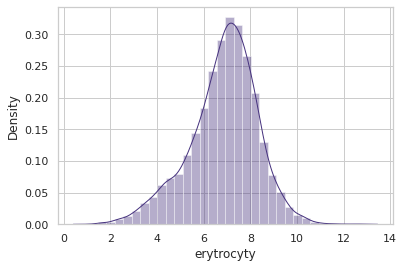

In [100]:
sns.distplot(data_labor["erytrocyty"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[erytrocyty] Medián:  ", data_labor["erytrocyty"].median())
print(f"[erytrocyty] Modus:   ", data_labor.mode()["erytrocyty"][0])
print(f"[erytrocyty] Priemer: ", data_labor["erytrocyty"].mean())
print(f"[erytrocyty] Rozptyl: ", np.var(data_labor["erytrocyty"]))
print(f"[erytrocyty] Smerodajná odchylka: ", np.std(data_labor["erytrocyty"]))

### Leukocyty

Pri leukocytoch vidíme menší spike presne v strede distribúcie, čo môže byť náhoda
znásobená faktom, že sme nahradzovali chýbajúce hodnoty údajom, ktorý sa nachádza
práve na tom mieste.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[leukocyty] Medián:   6.07108
[leukocyty] Modus:    6.064355209737452
[leukocyty] Priemer:  6.0643552097374505
[leukocyty] Rozptyl:  1.0182179280312194
[leukocyty] Smerodajná odchylka:  1.0090678510542388


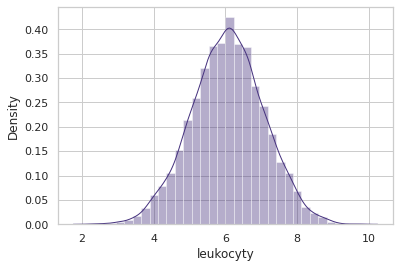

In [101]:
sns.distplot(data_labor["leukocyty"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="leukocyty", bins=24, kde=True)
print(f"[leukocyty] Medián:  ", data_labor["leukocyty"].median())
print(f"[leukocyty] Modus:   ", data_labor.mode()["leukocyty"][0])
print(f"[leukocyty] Priemer: ", data_labor["leukocyty"].mean())
print(f"[leukocyty] Rozptyl: ", np.var(data_labor["leukocyty"]))
print(f"[leukocyty] Smerodajná odchylka: ", np.std(data_labor["leukocyty"]))


### Trombocyty

Pri trombocytoch vidíme pomerne veľkú odchýlku v strede distribúcie. Inak je distribúcia Gaussova,
čo znamená, že hodnoty sú rovnomerne rozložené naprieč grafom.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[trombocyty] Medián:   6.084394732924253
[trombocyty] Modus:    6.084394732924253
[trombocyty] Priemer:  6.084394732924253
[trombocyty] Rozptyl:  1.0123415736654913
[trombocyty] Smerodajná odchylka:  1.0061518641166904


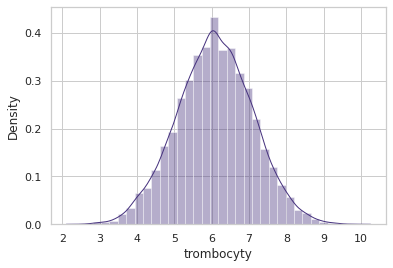

In [102]:
sns.distplot(data_labor["trombocyty"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="trombocyty", bins=24, kde=True)
print(f"[trombocyty] Medián:  ", data_labor["trombocyty"].median())
print(f"[trombocyty] Modus:   ", data_labor.mode()["trombocyty"][0])
print(f"[trombocyty] Priemer: ", data_labor["trombocyty"].mean())
print(f"[trombocyty] Rozptyl: ", np.var(data_labor["trombocyty"]))
print(f"[trombocyty] Smerodajná odchylka: ", np.std(data_labor["trombocyty"]))

### Váha

Ako sme vyčítali z metódy describe() na začiatku, tak na grafe sa nám potvrdilo,
že niektoré hodnoty váh siahajú do záporného regiónu. O to sa postaráme neskôr
v tomto notebooku.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[weight] Medián:   70.7939
[weight] Modus:    -13.06891
[weight] Priemer:  70.30565801624712
[weight] Rozptyl:  1223.2637015794558
[weight] Smerodajná odchylka:  34.9751869413082


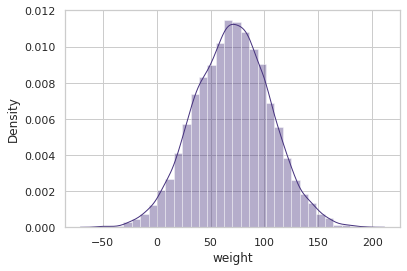

In [103]:
sns.distplot(data_labor["weight"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="weight", bins=24, kde=True)
print(f"[weight] Medián:  ", data_labor["weight"].median())
print(f"[weight] Modus:   ", data_labor.mode()["weight"][0])
print(f"[weight] Priemer: ", data_labor["weight"].mean())
print(f"[weight] Rozptyl: ", np.var(data_labor["weight"]))
print(f"[weight] Smerodajná odchylka: ", np.std(data_labor["weight"]))

### Hemoglobin

Pri hemoglobíne vidíme, že distribúcia nie je Gaussova, pretože má veľký sklon a v maximálnych hodnotách
je krivka široká, to znamená, že veľká časť dát má hodnotu blízku k maximálnej.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[hemoglobin] Medián:   6.11531
[hemoglobin] Modus:    6.0629517464788725
[hemoglobin] Priemer:  6.062951746478873
[hemoglobin] Rozptyl:  3.0341928901248703
[hemoglobin] Smerodajná odchylka:  1.7418934784093056


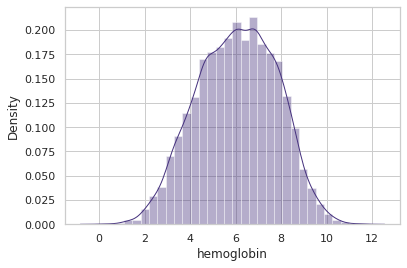

In [104]:
sns.distplot(data_labor["hemoglobin"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="trombocyty", bins=24, kde=True)
print(f"[hemoglobin] Medián:  ", data_labor["hemoglobin"].median())
print(f"[hemoglobin] Modus:   ", data_labor.mode()["hemoglobin"][0])
print(f"[hemoglobin] Priemer: ", data_labor["hemoglobin"].mean())
print(f"[hemoglobin] Rozptyl: ", np.var(data_labor["hemoglobin"]))
print(f"[hemoglobin] Smerodajná odchylka: ", np.std(data_labor["hemoglobin"]))

## b) Párová analýza dát
-------------------------------------------------------
### **Skúmanie vzťahov medzi dvojicami atribútov**

<br>

V tejto časti zisťujeme **závislosti** medzi rôznymi atribútmi po dvojiciach. Keďže naše dáta
ešte stále nie sú očistené, výsledné závislosti **nemôžu byť stopercentne korektné**.
</br>
<br>
Na začiatok sme vykreslili **heatmapu**, z ktorej môžeme vyčítať **závislosti medzi všetkými dvojicami
atribútov**. Vďaka tomu máme všeobecný prehľad o koreláciách v našom datasete.
</br>

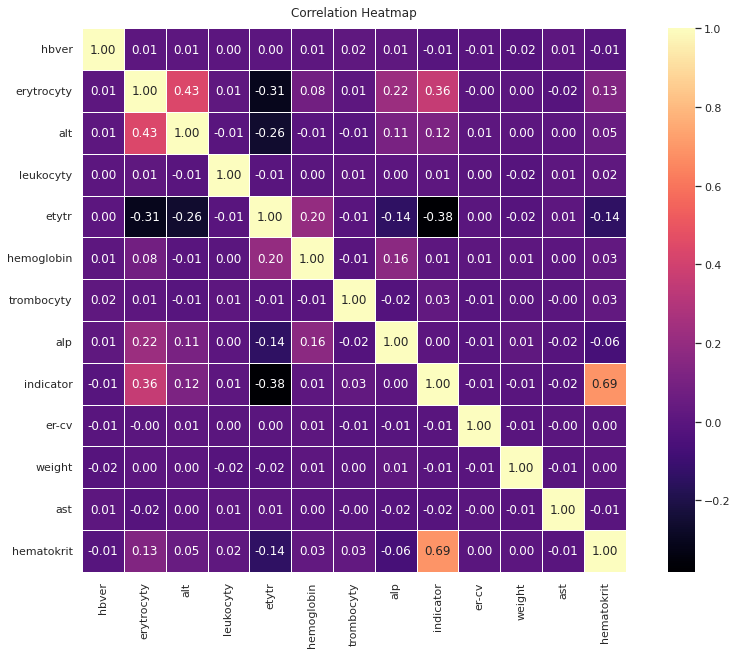

In [105]:
fig, ax = plt.subplots(figsize=(15, 10))
heatmap = sns.heatmap(data_labor.corr(), linewidths=.5, square=True,
                      annot=True, linewidth=0.5, cmap="magma", fmt=".2f")
heatmap.set_title('Correlation Heatmap', pad=12);

Heatmapa z prechádzajúcej bunky nám napovedá, ktoré atribúty môžeme skúmať z hľadiska závislostí.
Na začiatok si vyberieme dvojice, ktoré majú vyšší koeficient korelácie, a teda tie
dvojice atribútov od seba závisia.
<br>

Korelácie medzi dvojicami, ktoré sme si vybrali na párovú analýzu:
- erytrocyty - alt
- hemoglobín - alp
- hemoglobín - etytr
- erytrocyty - leukocyty

Dvojice so závislou premennou:
- indikátor - erytrocyty
- indikátor - hematokrit
- indikátor - trombocyty
- indikátor - etytr


### Erytrocyty a alt
Na tomto grafe môžeme pozerať **silnú závislosť**, keďže rozptyl dát je exponenciálna krivka.
Pri atribútoch, ktoré nekorelujú, budeme vidieť rôzne atypické "machule".
</br>

<AxesSubplot:xlabel='erytrocyty', ylabel='alt'>

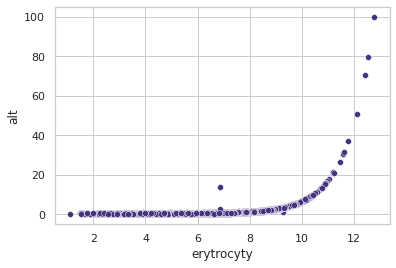

In [106]:
sns.scatterplot(data=data_labor, x="erytrocyty", y="alt")

### Hemoglobín a alp
Na danom grafe pozorujeme **sínusovú závislosť**, keďže osciluje v pravidelnom intervale.
V približnom odhade môžeme tvrdiť, že hodnoty atribútu alp dosahujú maximum vtedy,
ak sa hodnota hemoglobínu blíži k 6% a periodicky osciluje po približne šiestich
percentách.

<AxesSubplot:xlabel='hemoglobin', ylabel='alp'>

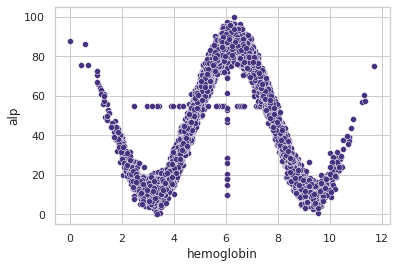

In [107]:
sns.scatterplot(data=data_labor, x="hemoglobin", y="alp")

### Hemoglobin a etytr
V danom porovnaní môžeme pozorovať miernu pozitívnu koreláciu medzi zvolenými atribútmi,
keďže distribúcia v grafe je, laicky povedané, jemne naklonená doprava hore.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


<AxesSubplot:xlabel='hemoglobin', ylabel='etytr'>

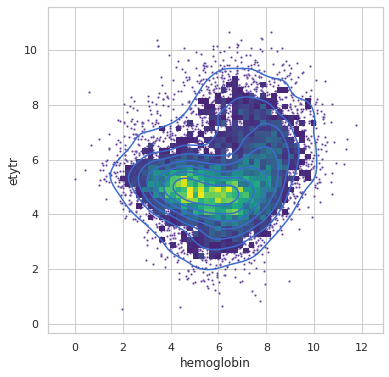

In [108]:
plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data_labor, x="hemoglobin", y="etytr", s=5, color="#5e3c99")
sns.histplot(data=data_labor, x="hemoglobin", y="etytr", bins=50, pthresh=.1, cmap="viridis", shrink=.4)
sns.kdeplot(data=data_labor, x="hemoglobin", y="etytr", levels=8, color="#3b6cce", linewidth=.75)

Po relatívne závislých atribútoch sme prešli k prípadom, kedy sa korelácie pohybujú v záporných
hodnotách.

### Erytrocyty a Leukocyty
Ako prvú máme vykreslenú závislosť medzi atribútmi erytrocyty a leukocyty, ktorých hodnota korelácie
sa blíži v rádoch stotín k nule.

Nulová korelácia je pozorovateľná na grafe, keďže výskyt závislosti je roztrúsený v kruhovom tvare
uprostred grafu.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


<AxesSubplot:xlabel='erytrocyty', ylabel='leukocyty'>

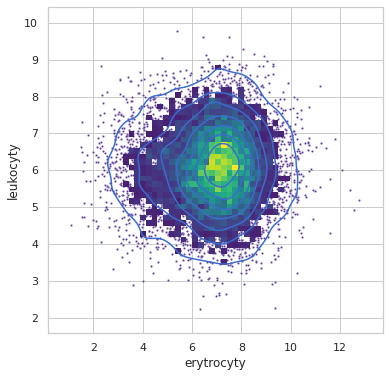

In [109]:
# sns.scatterplot(data=data_labor, x="erytrocyty", y="leukocyty")

plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data_labor, x="erytrocyty", y="leukocyty", s=5, color="#5e3c99")
sns.histplot(data=data_labor, x="erytrocyty", y="leukocyty", bins=50, pthresh=.1, cmap="viridis", shrink=.4)
sns.kdeplot(data=data_labor, x="erytrocyty", y="leukocyty", levels=8, color="#3b6cce", linewidth=.75)

### Erytrocyty a etytr
Pri porovnaní atribútov **erytrocyty** a **etytr** pozorujeme stredne veľkú negatívnu koreláciu,
keďže rozptyl dát je "negatívne naklonený", čo znamená, že pri rastúcej hodnote erytrocytov
klesá hodnota atribútu etytr.

KeyboardInterrupt: 

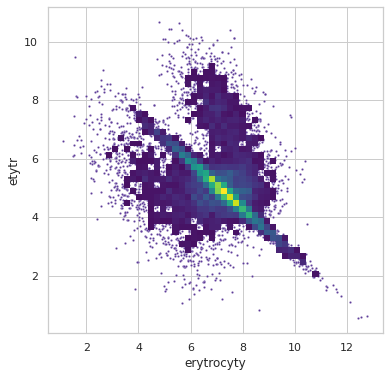

In [110]:
plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data_labor, x="erytrocyty", y="etytr", s=5, color="#5e3c99")
sns.histplot(data=data_labor, x="erytrocyty", y="etytr", bins=50, pthresh=.1, cmap="viridis", shrink=.4)
sns.kdeplot(data=data_labor, x="erytrocyty", y="etytr", levels=8, color="#3b6cce", linewidth=.75)

### **Skúmanie závislostí medzi predikovanou premennou a ďalšími atribútmi**
V tejto časti sa povenujeme **závislostiam medzi predikovanou premennou** a ostatnými premennými.
Predikovaná premenná je v našom prípade **indicator**.

### Indikátor a erytrocyty (0.36)

Z heatmapy vieme vyčítať, že dvojica atribútov indikátor a erytrocyty je **mierne pozitívne závislá**.
Tieto rozdiely sú badateľné na grafe nižšie, keďže zhluky dát sú zľahka rozdielne deformované a
vertikálne posunuté.

In [ ]:
with sns.axes_style('white'):
    graph = sns.jointplot("indicator", "erytrocyty", data=data_labor, kind='hex')
    graph.plot_joint(sns.kdeplot, color="#5e5ce9")
    graph.plot_marginals(sns.rugplot, color="blue", height=-.12, clip_on=False)

In [ ]:
sns.violinplot(data=data_labor, x='indicator', y = 'erytrocyty')

### Indikátor a hematokrit (0.69)

Na tejto dvojici atribútov pozorujeme veľmi **silnú pozitívnu závislosť**, ktorá je viditeľná na oboch
typoch grafov (violin plote aj joint plote). S nárastom hodnoty indikátoru z 0 na 1 výrazne rastie
aj hodnota hematokritu.

In [ ]:
with sns.axes_style('white'):
    graph = sns.jointplot("indicator", "hematokrit", data=data_labor, kind='hex')
    graph.plot_joint(sns.kdeplot, color="#5e5ce9")
    graph.plot_marginals(sns.rugplot, color="blue", height=-.12, clip_on=False)

In [ ]:
sns.violinplot(data=data_labor, x='indicator', y = 'hematokrit')


### Indikátor a trombocyty (0.027)

**Takmer nulová závislosť** - hodnoty hematokritu sú takmer zhodné pre rôzne hodnoty indikátoru.

In [ ]:
with sns.axes_style('white'):
    graph = sns.jointplot("indicator", "trombocyty", data=data_labor, kind='hex')
    graph.plot_joint(sns.kdeplot, color="#5e5ce9")
    graph.plot_marginals(sns.rugplot, color="blue", height=-.12, clip_on=False)

In [ ]:
sns.violinplot(data=data_labor, x='indicator', y = 'trombocyty')

### Indikátor a etytr (-0.38)

**Mierne negatívna závislosť** je viditeľná tak, že pri náraste hodnoty indikátoru klesá
hodnota atribútu etytr. Distribúcia pri rôznom indikátore je taktiež **odlišná**.

In [ ]:
with sns.axes_style('white'):
    graph = sns.jointplot("indicator", "etytr", data=data_labor, kind='hex')
    graph.plot_joint(sns.kdeplot, color="#5e5ce9")
    graph.plot_marginals(sns.rugplot, color="blue", height=-.12, clip_on=False)

In [ ]:
sns.violinplot(data=data_labor, x='indicator', y = 'etytr')

## c) Formulácia a štatistické overenie hypotéz o dátach
-------------------------------------------------------
### Formulácia hypotéz

#### 1. Hypotéza:
##### (**H0**): Pacienti v lepšom stave majú rovnaké hodnoty erytrocytov v krvi ako pacienti
##### v horšom stave.
##### (**H1**): Pacienti v lepšom stave majú iné hodnoty erytrocytov v krvi ako pacienti
##### v horšom stave.

#### 2. Hypotéza:
##### (**H0**): Pacienti v horšom stave majú hodnoty objemu krviniek (hematokrit) rovnaké
##### ako pacienti v lepšom stave.
##### (**H1**): Pacienti v horšom stave majú hodnoty objemu krviniek (hematokrit) rôzne
##### ako pacienti v lepšom stave
-------------------------------------------------------

Tieto hypotézy sme si zvolili z toho dôvodu, že predchádzajúca časť nám naznačila tieto poznatky,
z ktorých vychádzajú dané hypotézy. Pred samotným začiatkom štatistického overenia hypotéz
vykreslíme zopár grafov, z ktorých zistíme, či sú dané **dáta vhodné** na použitie štatistických
testov.

#### 1. Hypotéza:

V prvom boxenplote môžeme vidieť iný typ porovnania závislostí indikátora od erytrocytov, ako
sme použili v predchádzajúcej časti, no výsledok je v podstate rovnaký.
Pozorujeme miernu koreláciu medzi zvolenou dvojicou atribútov.

In [ ]:
g = sns.boxenplot(data=data_labor, x='indicator', y = 'erytrocyty')

Následne skontrolujeme atribúty indikátor a erytrocyty a ich hodnoty, napr. či sú ich distribúcie
normálne alebo či ich dáta nezasahujú do záporných hodnôt, čo je z logického hľadiska nezmysel.

In [ ]:
data_labor[['erytrocyty', 'indicator']].describe()

In [ ]:
sns.distplot(data_labor["erytrocyty"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[erytrocyty] Medián:  ", data_labor["erytrocyty"].median())
print(f"[erytrocyty] Modus:   ", data_labor.mode()["erytrocyty"][0])
print(f"[erytrocyty] Priemer: ", data_labor["erytrocyty"].mean())
print(f"[erytrocyty] Rozptyl: ", np.var(data_labor["erytrocyty"]))
print(f"[erytrocyty] Smerodajná odchylka: ", np.std(data_labor["erytrocyty"]))

In [ ]:
sns.distplot(data_labor["indicator"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[indicator] Medián:  ", data_labor["indicator"].median())
print(f"[indicator] Modus:   ", data_labor.mode()["indicator"][0])
print(f"[indicator] Priemer: ", data_labor["indicator"].mean())
print(f"[indicator] Rozptyl: ", np.var(data_labor["indicator"]))
print(f"[indicator] Smerodajná odchylka: ", np.std(data_labor["indicator"]))

Z danej krátkej analýzy dvoch atribútov sme zistili, že hodnoty indikátora sú
v očakávanej norme a hodnoty erytrocytov sú pre danú analýzu taktiež
akceptovateľné.

Následne sme rozdelili dataset do **dvoch podsetov podľa hodnoty indikátora**,
aby sme mohli pracovať s našimi hypotézami.

#### Delenie atribútov do dvoch setov podľa indikátora:

In [ ]:
data_0_erytrocyty = data_labor.loc[data_labor["indicator"] == 0, "erytrocyty"]
data_0_erytrocyty

In [ ]:
sns.distplot(data_0_erytrocyty, kde=True, kde_kws={"lw": 1}, bins=32, label="Indicator 0")
plt.legend()

In [ ]:
sm.qqplot(data_0_erytrocyty, fit=True, line="45")
plt.show()

In [ ]:
data_1_erytrocyty = data_labor.loc[data_labor["indicator"] == 1, "erytrocyty"]
data_1_erytrocyty

In [ ]:
sns.distplot(data_1_erytrocyty, kde=True, kde_kws={"lw": 1}, bins=32, label="Indicator 1")
plt.legend()

In [ ]:
sm.qqplot(data_1_erytrocyty, fit=True, line="45")
plt.show()


Aby sme dodržali korektnosť pri vykonávaní nasledujúcich testov, rozhodli sme sa
z našich datasetov vybrať rovnako veľkú vzorku pre oba hodnoty indikátoru. Tým zaručíme
aj použiteľnosť Shapiro-Wilkovho testu, ktorý je vhodný pre dáta do 5000 záznamov.

In [ ]:
print(data_0_erytrocyty.count())
print(data_1_erytrocyty.count())

Kedže počet záznamov v dataframe data_0_erytrocyty **(3558)** je menší ako počet záznamov v
dataframe data_1_erytrocyty **(6413)**, z data_1_erytrocyty vyberieme **toľko záznamov, koľko je v
data_0_erytrocyty**

In [ ]:
data_1_erytrocyty = data_1_erytrocyty.sample(data_0_erytrocyty.count())
print(data_0_erytrocyty.count())
print(data_1_erytrocyty.count())

Z predchádzajúcich grafov je nám naznačené, že **nepôjde o normálnu distribúciu**.
Následne sme si vypočítali Cohenovo déčko, aby sme vedeli určiť silu nášho testu,
resp. silu presvedčenia o výsledku, ktorý dostaneme v ďalších testoch.

Výsledok je väčší ako učebnicová hodnota 0.75, čo znamená, že výsledok nášho testu
bude dostatočne presvedčivý.

In [ ]:
def cohen_d(x1, x2):
    nx1 = len(x1)
    nx2 = len(x2)
    s = np.sqrt(((nx1-1) * np.std(x1, ddof=1)**2 + (nx2-1) * np.std(x2, ddof=1)**2) / (nx1 + nx2 - 2))
    return (np.abs(np.mean(x1) - np.mean(x2))) / s

c_d_erytrocyty = cohen_d(data_0_erytrocyty, data_1_erytrocyty)
c_d_erytrocyty


Keďže sme si dáta rozdelili do dvoch setov podľa hypotézy, prešli sme na
**overenie nulovej hypotézy**, aby sme sa uistili,
že dáta pochádzajú z normálnej distribúcie.
Predpokladali sme, že dáta budú pochádzať skôr z rôznych distribúcií ako normálnych.

Na to nám slúži **Shapiro-Wilkov test**.

In [ ]:
sns.histplot(data=data_0_erytrocyty)
alpha = 0.05
shapiro_test = stats.shapiro(data_0_erytrocyty)
print(shapiro_test.pvalue)

if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (fail to reject H0)')
else:
    print('Iná distribúcia (reject H0)')

In [ ]:
sns.histplot(data=data_1_erytrocyty)
alpha = 0.05
shapiro_test = stats.shapiro(data_1_erytrocyty)
print(shapiro_test.pvalue)

if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (fail to reject H0)')
else:
    print('Iná distribúcia (reject H0)')

Keďže podľa Shapiro-Wilkovho testu distribúcia oboch vzoriek **nepatrí
do skupiny normálnych** a naše dáta sú nepárové, pokračujeme testom, ktorý sa
nazýva **Mann-Whitneyho test**. Mann-Whitneyho test použijeme ako potvrdenie
výsledku SW testu.

In [ ]:
alpha = 0.05
stat, p = mannwhitneyu(data_0_erytrocyty, data_1_erytrocyty)
print(p)

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

#### Záver 1. hypotézy

Mann-Whitneyho test potvrdil, že hypotézu **H0 môžeme zamietnuť**
s dostatočnou mierou presvedčenia (aj kvôli Cohen's d), vďaka čomu
môžeme tvrdiť, že pacienti v lepšom stave majú **nie rovnaké hodnoty erytrocytov**
v krvi. Minimálne výsledné hodnoty oboch testov naznačujú fakt, že hypotéza
H0 nie je konzistentná.


#### 2. Hypotéza:

##### (**H0**): Pacienti v horšom stave majú hodnoty objemu krviniek (hematokrit) rovnaké
##### ako pacienti v lepšom stave.
##### (**H1**): Pacienti v horšom stave majú hodnoty objemu krviniek (hematokrit) rôzne
##### ako pacienti v lepšom stave.
-------------------------------------------------------

Opäť sme začali iným typom zobrazenia závislostí medzi zvolenými atribútmi (tentokrát
šlo o indikátor a hematokrit).

In [ ]:
g = sns.boxenplot(data=data_labor, x='indicator', y = 'hematokrit')

Následne skontrolujeme atribúty indikátor a hematokrit a ich hodnoty, napr. či sú ich distribúcie
normálne alebo či ich dáta nezasahujú do záporných hodnôt, čo je z logického hľadiska nezmysel.

In [ ]:
data_labor[['hematokrit', 'indicator']].describe()

In [ ]:
sns.distplot(data_labor["hematokrit"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[hematokrit] Medián:  ", data_labor["hematokrit"].median())
print(f"[hematokrit] Modus:   ", data_labor.mode()["hematokrit"][0])
print(f"[hematokrit] Priemer: ", data_labor["hematokrit"].mean())
print(f"[hematokrit] Rozptyl: ", np.var(data_labor["hematokrit"]))
print(f"[hematokrit] Smerodajná odchylka: ", np.std(data_labor["hematokrit"]))

In [ ]:
sns.distplot(data_labor["indicator"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[indicator] Medián:  ", data_labor["indicator"].median())
print(f"[indicator] Modus:   ", data_labor.mode()["indicator"][0])
print(f"[indicator] Priemer: ", data_labor["indicator"].mean())
print(f"[indicator] Rozptyl: ", np.var(data_labor["indicator"]))
print(f"[indicator] Smerodajná odchylka: ", np.std(data_labor["indicator"]))

Z tejto krátkej štatistickej analýzy sme zistili, že hodnoty oboch atribútov
sa pohybujú v očakávaných intervaloch, no distribúcia hematokritu nám naznačila
možný výsledok Shapiro-Wilkovho testu.

Následne sme si rozdelili dataset do **dvoch podsetov podľa hodnoty indikátora**.

In [ ]:
data_0_hematokrit = data_labor.loc[data_labor["indicator"] == 0, "hematokrit"]
data_0_hematokrit

In [ ]:
sns.distplot(data_0_hematokrit, kde=True, kde_kws={"lw": 1}, bins=32, label="Indicator 0")
plt.legend()

In [ ]:
sm.qqplot(data_0_hematokrit, fit=True, line="45")
plt.show()

In [ ]:
data_1_hematokrit = data_labor.loc[data_labor["indicator"] == 1, "hematokrit"]
data_1_hematokrit

In [ ]:
sns.distplot(data_1_hematokrit, kde=True, kde_kws={"lw": 1}, bins=32, label="Indicator 1")
plt.legend()

In [ ]:
sm.qqplot(data_1_hematokrit, fit=True, line="45")
plt.show()

Z daných dát je očividná **rozdielnosť** týchto dvoch vzoriek ako aj ich **distribúcia**,
ktorá má od normálnosti pomerne ďaleko.

Prešli sme k časti vybratia rovnako veľkej vzorky pre rôzne hodnoty predikovanej premennej.
Dôvodom bolo opäť, zaručenie rovnakých podmienok
pre nasledovné štatistické testy.

In [ ]:
print(data_0_hematokrit.count())
print(data_1_hematokrit.count())

V tomto prípade rovnako ako v prípade erytrocytov je počet záznamov pre data_0_hematokrit **(3558)**
nižší ako počet záznamov pre data_1_hematokrit **(6413)**, takže sme tiež vybrali z data_1_hematokrit
rovanký počet záznamov ako pre data_0_hematokrit.

In [ ]:
data_1_hematokrit = data_1_hematokrit.sample(data_0_hematokrit.count())
data_1_hematokrit

In [ ]:
print(data_0_hematokrit.count())
print(data_1_hematokrit.count())

Z predchádzajúcich grafov je jasné, že **nepôjde o normálnu distribúciu**.
Následne sme prešli na výpočet **Cohen's d**.

In [ ]:
c_d_hematokrit = cohen_d(data_0_hematokrit, data_1_hematokrit)
c_d_hematokrit

Výsledok je väčší ako učebnicová hodnota 1 a pohybuje sa okolo 2,
čo znamená, že **rozdiel medzi priemermi našich dvoch datasetov je rádovo
väčší ako 2 štandardné odchýlky**.

Vďaka tejto informácií môžeme tvrdiť, že výsledok nasledujúcich testov je
**veľmi dôveryhodný**.

Shapiro-Wilkov test overíme aj napriek qq-plotom,
aby sme si mohli byť istí, že nejde o normálnu distribúciu.

In [ ]:
sns.histplot(data=data_0_hematokrit)
alpha = 0.05
shapiro_test = stats.shapiro(data_0_hematokrit)
print(shapiro_test.pvalue)

if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (fail to reject H0)')
else:
    print('Iná distribúcia (reject H0)')

In [ ]:
sns.histplot(data=data_1_hematokrit)
alpha = 0.05
shapiro_test = stats.shapiro(data_1_hematokrit)
print(shapiro_test.pvalue)

if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (fail to reject H0)')
else:
    print('Iná distribúcia (reject H0)')

Shapiro-Wilkov test nám vrátil **extrémne nízke p-hodnoty**, čo naznačuje vyvrátenie
nulovej hypotézy. Daný predpoklad sme si ešte potvrdili **Mann-Whitneyho testom**
v nasledujúcej bunke.

In [ ]:
alpha = 0.05
stat, p = mannwhitneyu(data_0_hematokrit, data_1_hematokrit)
print(p)

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

#### Záver 2. hypotézy

Mann-Whitneyho test potvrdil, že hypotézu **H0 môžeme zamietnuť** v prospech H1.
To znamená, že môžeme s dostatočným presvedčením predpokladať znenie alternatívnej
hypotézy.

## d) Identifikácia problémov v dátach s navrhnutým riešením
-------------------------------------------------------
### Identifikácia problémov

Táto sekcia prvej fázy je venovaná **čisteniu dát**, respektíve **hľadaniu problémov**
v datasete s návrhom riešení pre dané problémy. Všetky navrhnuté zmeny sme zakomentovali,
aby sme mali funkčný k dispozícii už do druhej fázy.

Postupovali sme problém po probléme v oboch .csv súboroch naraz.

### Nevhodná štruktúra dát

Na úvod sme otvorili druhý .csv súbor s názvom profiles.csv a vykonali sme základné
úpravy ako aj pri labor.csv na začiatku notebooku (vyhodenie prvého stĺpca, kde sú len
čísla).

In [111]:
data_profiles = pd.read_csv("dataset/profiles.csv", sep="\t")
data_profiles = data_profiles.iloc[:, 1:]
data_profiles

,birthdate,address,race,current_location,blood_group,ssn,name,sex,residence
0,1956/01/07,"76379 Lynn Drive\nKevinchester, VA 69374",Asian,"(Decimal('44.490493'), Decimal('-141.873900'))",A-,328-14-6945,Michelle Perez,F,"39446 Gabrielle Pass Suite 764\nEast Danielle,..."
1,"10/28/1984, 00:00:00","PSC 8195, Box 7465\nAPO AP 27883",White,"(Decimal('-60.5512795'), Decimal('101.998999'))",B+,841-17-8814,Christopher Bishop,M,"18019 Mary Mountains\nScottport, IA 19641"
2,1966-08-30,"3345 Daniels Parks Suite 080\nNew Nancy, TX 84969",Asian,"(Decimal('-24.9800585'), Decimal('-18.208792'))",A-,871-67-9396,Emily Stevens,F,"4906 Matthew Field\nGalvanfort, SC 22896"
3,1910/08/08,"3368 Brent Mall Suite 782\nPort Cheryl, WV 04259",black,"(Decimal('51.679296'), Decimal('-96.270056'))",O+,859-80-8937,Carla Hernandez,F,USCGC Schroeder\nFPO AE 57164
4,1972-10-28,"175 Michael Neck\nSouth Nicoleberg, PA 96022",White,"(Decimal('-85.5392635'), Decimal('-154.434283'))",O+,481-92-7602,Anthony Smith,M,"2148 Webb Valley\nNorth Madison, KS 07434"
...,...,...,...,...,...,...,...,...,...
3123,1988/07/28,"54115 Shelia Mall\nPerkinsland, CT 29608",White,"(Decimal('-7.930086'), Decimal('-151.534279'))",O-,420-58-2110,David Willis,M,"5488 Michelle Crescent Apt. 782\nMelissatown, ..."
3124,1948-05-03,USCGC Bowman\nFPO AP 06685,White,"(Decimal('50.0322335'), Decimal('166.727247'))",AB-,298-66-4795,Jeffrey Sims,M,"559 Kenneth Track Suite 021\nEast Ashley, TX 6..."
3125,1935/11/18,"616 John Pass Apt. 345\nBurnetttown, AZ 24833",Asian,"(Decimal('-35.8693315'), Decimal('111.435733'))",AB-,716-72-0406,Thomas Kennedy,M,"466 Ryan Stravenue\nGalvanbury, AZ 98577"
3126,"12/31/2003, 00:00:00",USCGC Baker\nFPO AE 40268,White,"(Decimal('-31.539476'), Decimal('162.149407'))",O-,678-62-0044,Bradley Barrett,M,"653 Dixon Loaf\nSouth Branditown, TX 58506"


Pred samotnou úpravou nevhodných štruktúr dát sme si vypísali prvých 20 záznamov,
na ktorých sme sa pokúsili detekovať abnormality v ich štruktúre zápisu.
Dataset data_labor bol z tohto ohľadu v poriadku.

In [ ]:
data_labor.head(20)

In [ ]:
data_profiles.head(20)

V data_profiles sme si všimli hneď niekoľko problémov v našich záznamoch. Prvý z nich
bol hneď v atribúte birthdate, kde bol dátum narodenia zapísaný niekoľkými rôznymi
spôsobmi.

Ďalšia nezrovnalosť bola v atribútoch address a residence, kde sa v záznamoch nachádzali
znaky pre nový riadok a ďalšie formátovacie znaky typu \r apod.

Poslednou chybou v rámci pozorovania prirodzeného jazyka boli záznamy pre current_location,
ktoré mali nevhodný formát.

Naše navrhnuté riešenia sú zakomentované nižšie.

* Pre atribút birthdate navrhujeme použitie predefinovaného pandas formátu, ktorý
by v takomto prípade nahradil všetky rozličné formáty jednotným.
* Pre atribúty currect_location, address a residence možno použiť nahradzovanie
regulárnym výrazom a vstavanou metódou replace(), ktorou by sa nahradili všetky
nechcené znaky, ktoré sa v záznamoch nachádzajú.

In [ ]:
# data_profiles[["birthdate"]] = data_profiles[["birthdate"]].apply(pd.to_datetime)

In [61]:
# data_profiles["current_location"] = data_profiles["current_location"].str.replace(r"[A-Za-z]", "", regex=True)
# data_profiles["current_location"] = data_profiles["current_location"].str.replace(r"[()']", "", regex=True)
# data_profiles

,birthdate,address,race,current_location,blood_group,ssn,name,sex,residence
0,1956/01/07,"76379 Lynn Drive\nKevinchester, VA 69374",Asian,"44.490493, -141.873900",A-,328-14-6945,Michelle Perez,F,"39446 Gabrielle Pass Suite 764\nEast Danielle,..."
1,"10/28/1984, 00:00:00","PSC 8195, Box 7465\nAPO AP 27883",White,"-60.5512795, 101.998999",B+,841-17-8814,Christopher Bishop,M,"18019 Mary Mountains\nScottport, IA 19641"
2,1966-08-30,"3345 Daniels Parks Suite 080\nNew Nancy, TX 84969",Asian,"-24.9800585, -18.208792",A-,871-67-9396,Emily Stevens,F,"4906 Matthew Field\nGalvanfort, SC 22896"
3,1910/08/08,"3368 Brent Mall Suite 782\nPort Cheryl, WV 04259",black,"51.679296, -96.270056",O+,859-80-8937,Carla Hernandez,F,USCGC Schroeder\nFPO AE 57164
4,1972-10-28,"175 Michael Neck\nSouth Nicoleberg, PA 96022",White,"-85.5392635, -154.434283",O+,481-92-7602,Anthony Smith,M,"2148 Webb Valley\nNorth Madison, KS 07434"
...,...,...,...,...,...,...,...,...,...
3123,1988/07/28,"54115 Shelia Mall\nPerkinsland, CT 29608",White,"-7.930086, -151.534279",O-,420-58-2110,David Willis,M,"5488 Michelle Crescent Apt. 782\nMelissatown, ..."
3124,1948-05-03,USCGC Bowman\nFPO AP 06685,White,"50.0322335, 166.727247",AB-,298-66-4795,Jeffrey Sims,M,"559 Kenneth Track Suite 021\nEast Ashley, TX 6..."
3125,1935/11/18,"616 John Pass Apt. 345\nBurnetttown, AZ 24833",Asian,"-35.8693315, 111.435733",AB-,716-72-0406,Thomas Kennedy,M,"466 Ryan Stravenue\nGalvanbury, AZ 98577"
3126,"12/31/2003, 00:00:00",USCGC Baker\nFPO AE 40268,White,"-31.539476, 162.149407",O-,678-62-0044,Bradley Barrett,M,"653 Dixon Loaf\nSouth Branditown, TX 58506"


In [62]:
# data_profiles["address"] = data_profiles["address"].str.replace(r"[\r\n]", " ", regex = True)
# data_profiles

,birthdate,address,race,current_location,blood_group,ssn,name,sex,residence
0,1956/01/07,"76379 Lynn Drive Kevinchester, VA 69374",Asian,"44.490493, -141.873900",A-,328-14-6945,Michelle Perez,F,"39446 Gabrielle Pass Suite 764\nEast Danielle,..."
1,"10/28/1984, 00:00:00","PSC 8195, Box 7465 APO AP 27883",White,"-60.5512795, 101.998999",B+,841-17-8814,Christopher Bishop,M,"18019 Mary Mountains\nScottport, IA 19641"
2,1966-08-30,"3345 Daniels Parks Suite 080 New Nancy, TX 84969",Asian,"-24.9800585, -18.208792",A-,871-67-9396,Emily Stevens,F,"4906 Matthew Field\nGalvanfort, SC 22896"
3,1910/08/08,"3368 Brent Mall Suite 782 Port Cheryl, WV 04259",black,"51.679296, -96.270056",O+,859-80-8937,Carla Hernandez,F,USCGC Schroeder\nFPO AE 57164
4,1972-10-28,"175 Michael Neck South Nicoleberg, PA 96022",White,"-85.5392635, -154.434283",O+,481-92-7602,Anthony Smith,M,"2148 Webb Valley\nNorth Madison, KS 07434"
...,...,...,...,...,...,...,...,...,...
3123,1988/07/28,"54115 Shelia Mall Perkinsland, CT 29608",White,"-7.930086, -151.534279",O-,420-58-2110,David Willis,M,"5488 Michelle Crescent Apt. 782\nMelissatown, ..."
3124,1948-05-03,USCGC Bowman FPO AP 06685,White,"50.0322335, 166.727247",AB-,298-66-4795,Jeffrey Sims,M,"559 Kenneth Track Suite 021\nEast Ashley, TX 6..."
3125,1935/11/18,"616 John Pass Apt. 345 Burnetttown, AZ 24833",Asian,"-35.8693315, 111.435733",AB-,716-72-0406,Thomas Kennedy,M,"466 Ryan Stravenue\nGalvanbury, AZ 98577"
3126,"12/31/2003, 00:00:00",USCGC Baker FPO AE 40268,White,"-31.539476, 162.149407",O-,678-62-0044,Bradley Barrett,M,"653 Dixon Loaf\nSouth Branditown, TX 58506"


In [63]:
# data_profiles["residence"] = data_profiles["residence"].str.replace(r"[\r\n]", " ", regex = True)
# data_profiles

,birthdate,address,race,current_location,blood_group,ssn,name,sex,residence
0,1956/01/07,"76379 Lynn Drive Kevinchester, VA 69374",Asian,"44.490493, -141.873900",A-,328-14-6945,Michelle Perez,F,"39446 Gabrielle Pass Suite 764 East Danielle, ..."
1,"10/28/1984, 00:00:00","PSC 8195, Box 7465 APO AP 27883",White,"-60.5512795, 101.998999",B+,841-17-8814,Christopher Bishop,M,"18019 Mary Mountains Scottport, IA 19641"
2,1966-08-30,"3345 Daniels Parks Suite 080 New Nancy, TX 84969",Asian,"-24.9800585, -18.208792",A-,871-67-9396,Emily Stevens,F,"4906 Matthew Field Galvanfort, SC 22896"
3,1910/08/08,"3368 Brent Mall Suite 782 Port Cheryl, WV 04259",black,"51.679296, -96.270056",O+,859-80-8937,Carla Hernandez,F,USCGC Schroeder FPO AE 57164
4,1972-10-28,"175 Michael Neck South Nicoleberg, PA 96022",White,"-85.5392635, -154.434283",O+,481-92-7602,Anthony Smith,M,"2148 Webb Valley North Madison, KS 07434"
...,...,...,...,...,...,...,...,...,...
3123,1988/07/28,"54115 Shelia Mall Perkinsland, CT 29608",White,"-7.930086, -151.534279",O-,420-58-2110,David Willis,M,"5488 Michelle Crescent Apt. 782 Melissatown, N..."
3124,1948-05-03,USCGC Bowman FPO AP 06685,White,"50.0322335, 166.727247",AB-,298-66-4795,Jeffrey Sims,M,"559 Kenneth Track Suite 021 East Ashley, TX 66195"
3125,1935/11/18,"616 John Pass Apt. 345 Burnetttown, AZ 24833",Asian,"-35.8693315, 111.435733",AB-,716-72-0406,Thomas Kennedy,M,"466 Ryan Stravenue Galvanbury, AZ 98577"
3126,"12/31/2003, 00:00:00",USCGC Baker FPO AE 40268,White,"-31.539476, 162.149407",O-,678-62-0044,Bradley Barrett,M,"653 Dixon Loaf South Branditown, TX 58506"


### Duplicitné záznamy

Ďalším problémom v datasete, s ktorým sa je potrebné popasovať, je riešenie **duplikátnych riadkov**.
To je z hľadiska trénovanie umelej inteligencie podstatné, keďže **duplikátny riadok nepridáva
nijakú hodnotu** pre náš algoritmus, skôr môže narušiť jeho úsudok v prospech týchto rovnakých
riadkov.

V tejto bunke sme spočítali riadky, ktoré majú **duplikát** v celom datasete.

In [67]:
data_labor.duplicated(keep=False).sum()

198

Pre tento problém by sme zvolili riešenie, v ktorom by sme odstránili všetky duplikátne
riadky s tým, že by bol ponechaný len jeden z nich. V kóde, ktorý je zakomentovaný nižšie,
je aj kontrola, či sa daný úkon vykonal správne. Po takejto úprave je potrebné preindexovať
záznamy nanovo.

In [68]:
# data_labor.drop_duplicates(inplace=True)
# data_labor.duplicated(keep=False).sum()
# data_labor.index = range(len(data_labor))
# data_labor

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,1.0,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divorced,0.0,55.43592,-2.73558,51.62366,3.34206
1,1.0,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divorced,0.0,45.34617,81.56533,61.59374,5.78180
2,0.0,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divorced,0.0,29.29190,151.24191,47.96329,4.55230
3,0.0,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divorced,1.0,60.47398,83.89451,57.47174,7.17271
4,1.0,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divorced,1.0,41.10299,107.22958,34.25820,6.93681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,1.0,5.17020,5.61728,0.60775,5.35296,4.59956,5.52802,425-94-7489,Ryan Pineda,3.86179,75.76127,single,0.0,38.06206,60.90926,41.67857,4.57350
9868,0.0,5.70666,8.82840,2.35342,5.20966,3.73586,6.25482,375-27-0860,Travis Brown,5.03429,85.17538,widowed,1.0,48.35999,106.88451,23.49894,7.00122
9869,1.0,6.45549,6.83179,0.62415,7.84688,4.52864,5.57765,300-91-9095,Michelle Watson,6.38035,79.13200,married,1.0,28.09339,75.74349,23.52645,6.94466
9870,1.0,4.81311,7.26178,0.84372,6.76794,7.54696,7.07142,691-20-7896,Ryan Hahn,5.27933,79.64629,married,0.0,56.63966,52.15898,31.12380,4.98399


Naša datábaza profilov neobsahuje duplikátne riadky, čo je overené v nasledujúcej bunke.
Preto nie je potrebné v tomto sete riešiť nijakú duplicitu.

In [69]:
data_profiles.duplicated(keep=False).sum()

0

### Nejednotné formáty

Do okruhu nejednotných formátov spadajú prípady ako napr. rôzna veľkosť písmen,
preklepy, rôzne podoby zápisov alebo aj ich kombinácia.

Preto sme si na úvod vypísali všetky unikátne v hodnoty v atribútoch, pre
ktoré dáva zmysel riešiť nejednotný formát
(napr. pri atribúte rasy to dáva zmysel, keďže rás je len zopár unikátnych,
kdežto adresy takto kontrolovať nemôžeme).

Atribúty v data_labor, pri ktorých možno kontrolovať jednotný formát:
* smoker
* relationship

Atribúty v data_profiles, pri ktorých možno kontrolovať jednotný formát:
* race
* blood_group
* sex

### Nejednotný formát: data_labor

In [116]:
data_labor["smoker"].unique()

array(['yes', 'no', 'Y', 'N'], dtype=object)

V datasete data_labor pre atribút smoker sme identifikovali nejednotný formát,
v 4 rôznych verziách. Na tento problém by sme vykonali prekonvertovanie hodnôt
na numerické hodnoty 0 a 1, keďže to sú jediné možnosti, ako môže byť daný
atribút vyjadrený.

In [ ]:
"""
data_labor["smoker"] = data_labor["smoker"].str.replace("yes", "1")
data_labor["smoker"] = data_labor["smoker"].str.replace("no", "0")
data_labor["smoker"] = data_labor["smoker"].str.replace("Y", "1")
data_labor["smoker"] = data_labor["smoker"].str.replace("N", "0")
data_labor["smoker"] = data_labor["smoker"].astype(float)
"""

In [ ]:
data_labor["relationship"].unique()

Atribút relationship bol naformátovaný relatívne korektne, no upravili by sme
hrúbku pre slovo "divoced" na "divorced" pre lepšiu zrozumiteľnosť záznamov.

In [ ]:
# data_labor["relationship"] = data_labor["relationship"].str.replace("divoced", "divorced")

### Nejednotný formát: data_profiles

In [120]:
data_profiles["race"].unique()

array(['asian', 'white', 'black', 'hawaiian', 'indian'], dtype=object)

Pre rasy sme identifikovali preklep v prípade rasy **black**, kde bolo **blsck**.
Tento preklep by sme upravili funkciou replace().
Taktiež sme si všimli, že sa jednotlivé rasy začínajú na malé aj veľké písmená.
Túto skutočnosť by sme upravili pomocou funkcie lower(), ktorá zmení všetky veľké
písmená na malé.

In [119]:
# data_profiles["race"] = data_profiles["race"].str.replace("blsck", "black")
# data_profiles["race"] = data_profiles["race"].str.lower()

In [121]:
data_profiles["blood_group"].unique()

array(['A-', 'B+', 'O+', 'AB-', 'A+', 'O-', 'AB+', 'B-'], dtype=object)

Pre atribút blood_group boli formáty jednotné typu: veľké písmeno a +/-.
V budúcnosti možno pristúpime ku kroku nahradzovania týchto string hodnôt
na numerickú podobu.

In [122]:
data_profiles["sex"].unique()

array(['F', 'M'], dtype=object)

Tak ako pri atribúte smoker v predchádzajúcej časti, tak aj pri atribúte
pohlavia by sme vykonali zmenu formátu na numerické hodnoty 0 a 1.

In [ ]:
"""
data_profiles["sex"] = data_profiles["sex"].str.replace("M", "1")
data_profiles["sex"] = data_profiles["sex"].str.replace("F", "0")
data_profiles["sex"] = data_profiles["sex"].astype(float)
"""

Príkaz spustený v bunke nižšie kontroluje, či sú všetky hodnoty vo všetých stĺpcoch
**numerické**, vďaka čomu by sme mohli prehlásiť,
že dané atribúty obsahujú výlučne numerické hodnoty.

V kombinácii spolu s funkciou info() vieme potvrdiť, že ide o dátový typ float_64 a
že ostatné dátové typy sú typu object, čo je Python reprezentácia stringu.

In [124]:
data_labor.apply(lambda y: pd.to_numeric(y, errors='coerce').notnull().all())

smoker          False
hbver            True
erytrocyty       True
alt              True
leukocyty        True
etytr            True
hemoglobin       True
ssn             False
name            False
trombocyty       True
alp              True
relationship    False
indicator        True
er-cv            True
weight           True
ast              True
hematokrit       True
dtype: bool

In [125]:
data_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   smoker        9971 non-null   object 
 1   hbver         9971 non-null   float64
 2   erytrocyty    9971 non-null   float64
 3   alt           9971 non-null   float64
 4   leukocyty     9971 non-null   float64
 5   etytr         9971 non-null   float64
 6   hemoglobin    9971 non-null   float64
 7   ssn           9971 non-null   object 
 8   name          9971 non-null   object 
 9   trombocyty    9971 non-null   float64
 10  alp           9971 non-null   float64
 11  relationship  9971 non-null   object 
 12  indicator     9971 non-null   float64
 13  er-cv         9971 non-null   float64
 14  weight        9971 non-null   float64
 15  ast           9971 non-null   float64
 16  hematokrit    9971 non-null   float64
dtypes: float64(13), object(4)
memory usage: 1.3+ MB


In [126]:
data_profiles.apply(lambda y: pd.to_numeric(y, errors='coerce').notnull().all())

birthdate           False
address             False
race                False
current_location    False
blood_group         False
ssn                 False
name                False
sex                 False
residence           False
dtype: bool

In [127]:
data_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128 entries, 0 to 3127
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   birthdate         3128 non-null   object
 1   address           3128 non-null   object
 2   race              3128 non-null   object
 3   current_location  3128 non-null   object
 4   blood_group       3128 non-null   object
 5   ssn               3128 non-null   object
 6   name              3128 non-null   object
 7   sex               3128 non-null   object
 8   residence         3128 non-null   object
dtypes: object(9)
memory usage: 220.1+ KB


### Chýbajúce hodnoty

Chýbajúce hodnoty sme na našom datasete sčasti už upravili.

Pre data_labor sme ešte pred začiatkom prvej fázy vykonali nahradenie priemerom.
Túto skutočnosť, že náš dataset už naozaj nemá nijaké chýbajúce hodnoty, možno
overiť bunkou nižšie, ktorá zráta počet chýbajúcich hodnôt pre každý atribút
zvlášť.

In [139]:
data_labor.isna().sum()

smoker          0
hbver           0
erytrocyty      0
alt             0
leukocyty       0
etytr           0
hemoglobin      0
ssn             0
name            0
trombocyty      0
alp             0
relationship    0
indicator       0
er-cv           0
weight          0
ast             0
hematokrit      0
dtype: int64

Pre data_profiles navrhujeme rovnakú taktiku, ktorá v prvom rade spočíva v zistení,
či sa v datasete nachádzajú nejaké chýbajúce hodnoty. Ako možno vidieť v bunke nižšie,
tak chýbajúce dáta nemáme, a preto nijaké ďalšie kroky nie sú potrebné.

In [140]:
data_profiles.isna().sum()

birthdate           0
address             0
race                0
current_location    0
blood_group         0
ssn                 0
name                0
sex                 0
residence           0
dtype: int64

### Vychýlené hodnoty

V tejto sekcii sú navrhnutú postupy riešenia problémov s vychýlenými hodnotami.

Na začiatok je vhodné poznamenať, že problém vychýlených hodnôt sa týka len
číselných záznamov, a preto atribúty typu string nie je potrebné ošetrovať.
Začali sme výpisom datatypov v jednotlivých setoch.

In [143]:
data_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   smoker        9971 non-null   object 
 1   hbver         9971 non-null   float64
 2   erytrocyty    9971 non-null   float64
 3   alt           9971 non-null   float64
 4   leukocyty     9971 non-null   float64
 5   etytr         9971 non-null   float64
 6   hemoglobin    9971 non-null   float64
 7   ssn           9971 non-null   object 
 8   name          9971 non-null   object 
 9   trombocyty    9971 non-null   float64
 10  alp           9971 non-null   float64
 11  relationship  9971 non-null   object 
 12  indicator     9971 non-null   float64
 13  er-cv         9971 non-null   float64
 14  weight        9971 non-null   float64
 15  ast           9971 non-null   float64
 16  hematokrit    9971 non-null   float64
dtypes: float64(13), object(4)
memory usage: 1.3+ MB


In [144]:
data_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128 entries, 0 to 3127
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   birthdate         3128 non-null   object
 1   address           3128 non-null   object
 2   race              3128 non-null   object
 3   current_location  3128 non-null   object
 4   blood_group       3128 non-null   object
 5   ssn               3128 non-null   object
 6   name              3128 non-null   object
 7   sex               3128 non-null   object
 8   residence         3128 non-null   object
dtypes: object(9)
memory usage: 220.1+ KB


Zistili sme, že data_profiles obsahuje výlučne stringy, z tohto dôvodu nie je
potrebná korekcia pre vychýlené hodnoty.

Zoznam číselných atribútov, pre ktoré je možné upravovať tzv. outlierov:
* hbver
* erytrocyty
* alt
* leukocyty
* etytr
* hemoglobin
* trombocyty
* alp
* er-cv
* weight
* ast
* hematokrit

Na začiatok sme sa rozhodli pre výpis základných štatistkých údajov metódou
describe().

In [145]:
data_labor.describe()

,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,indicator,er-cv,weight,ast,hematokrit
count,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000
mean,6.071692,6.842049,1.120983,6.064355,5.318564,6.062952,6.084395,54.622262,0.643165,51.121580,70.305658,50.459989,6.461410
std,1.000834,1.460087,2.019724,1.009118,1.393256,1.741981,1.006202,26.103211,0.479090,12.856008,34.976941,12.771838,1.617865
min,2.148000,1.103640,0.000000,2.239400,0.548790,0.000000,2.587100,0.000000,0.000000,0.000000,-54.061950,0.000000,1.991860
25%,5.401305,6.037930,0.563945,5.393100,4.444160,4.780500,5.407585,31.460750,0.000000,42.546015,46.128010,41.770680,5.127505
50%,6.071692,7.004430,0.780950,6.071080,5.120390,6.115310,6.084395,58.533820,1.000000,50.954600,70.793900,50.618370,6.753050
75%,6.742105,7.807580,1.166560,6.730190,6.019805,7.378890,6.765420,78.880725,1.000000,59.861495,94.071090,59.039665,7.490275
max,10.532500,12.769020,100.000000,9.767710,10.673750,11.720370,9.774760,100.000000,1.000000,100.000000,194.734070,100.000000,13.021170


Z predchádzajúcej bunky sme zistili, že niektoré atribúty majú hodnoty viac
roztrúsené ako iné. Jedným z extrémov bola váha, ktorej hodnoty siahali až
do záporných hodnôt.

Skrz tieto zistenia sme sa rozhodli, že váhu budeme upravovať samostatne a všetky
zvyšné numerické atribúty ošetríme spoločne.

Pre atribút váhy by sme navrhli riešenie pripočítania priemeru k hodnotám, ktoré
spadajú pod istú hranicu s ohľadom na pohlavie.

Na úpravu outlierov pre ostatné atribúty navrhujeme využiť metódu detekcie extrémov,
ktoré ležia
za dolnou alebo hornou hranicou, ktoré možno vypočítať z tzv. IQR (Interquartile range).

### VÁHA

Náš návrh spočíva v zistení priemerných hodnôt u oboch pohlaví, čo by mohlo byť
zohľadnené pri nahradzovaní záporných hodnôt.

V bunkách nižšie je príklad kódu, ktorým by sme zistili rôzne hodnoty váh
u mužov a žien.

In [147]:
# merged_data = pd.merge(data_labor, data_profiles, on="ssn")
# merged_data.head(15)

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,yes,4.98718,8.89463,2.40520,5.75830,6.937120,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,"05/10/1923, 00:00:00","PSC 7581, Box 0898\nAPO AA 06225",asian,"(Decimal('56.944534'), Decimal('42.355764'))",B-,Jeremy Tanner,M,"6041 Henry Inlet\nHarrishaven, KS 63783"
1,no,5.00648,7.27841,0.82563,5.54481,5.032210,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,"05/10/1923, 00:00:00","PSC 7581, Box 0898\nAPO AA 06225",asian,"(Decimal('56.944534'), Decimal('42.355764'))",B-,Jeremy Tanner,M,"6041 Henry Inlet\nHarrishaven, KS 63783"
2,yes,6.71966,7.01351,1.00377,5.66778,5.127990,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,"05/10/1923, 00:00:00","PSC 7581, Box 0898\nAPO AA 06225",asian,"(Decimal('56.944534'), Decimal('42.355764'))",B-,Jeremy Tanner,M,"6041 Henry Inlet\nHarrishaven, KS 63783"
3,yes,6.67732,4.21847,0.66072,6.29064,5.199900,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,"12/08/1923, 00:00:00","175 Anita Pass\nLake Davidchester, NC 93833",asian,"(Decimal('84.160623'), Decimal('21.685531'))",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364\nLisashire, WY ..."
4,Y,6.06875,5.68453,0.58818,3.90764,5.879430,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,"12/08/1923, 00:00:00","175 Anita Pass\nLake Davidchester, NC 93833",asian,"(Decimal('84.160623'), Decimal('21.685531'))",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364\nLisashire, WY ..."
5,Y,6.05162,6.77173,0.45377,4.84219,5.318564,6.35723,513-39-9691,Jocelyn Kelly,5.20885,...,38.20747,5.74776,"12/08/1923, 00:00:00","175 Anita Pass\nLake Davidchester, NC 93833",asian,"(Decimal('84.160623'), Decimal('21.685531'))",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364\nLisashire, WY ..."
6,no,6.51444,7.94461,1.28337,5.83567,6.887580,6.45793,881-46-4810,Crystal Kelley,6.02783,...,47.96329,4.55230,"04/25/1939, 00:00:00","9086 Danny Cliff\nMitchellport, NM 64440",black,"(Decimal('75.7681605'), Decimal('-60.890199'))",A-,Crystal Kelley,F,Unit 6525 Box 9751\nDPO AP 62291
7,no,6.34520,7.38959,0.86698,4.17522,4.904440,3.91870,881-46-4810,Crystal Kelley,4.13432,...,46.57264,5.67578,"04/25/1939, 00:00:00","9086 Danny Cliff\nMitchellport, NM 64440",black,"(Decimal('75.7681605'), Decimal('-60.890199'))",A-,Crystal Kelley,F,Unit 6525 Box 9751\nDPO AP 62291
8,no,5.31645,7.41004,0.85142,7.38934,5.339350,4.28161,881-46-4810,Crystal Kelley,6.85927,...,44.68660,7.87799,"04/25/1939, 00:00:00","9086 Danny Cliff\nMitchellport, NM 64440",black,"(Decimal('75.7681605'), Decimal('-60.890199'))",A-,Crystal Kelley,F,Unit 6525 Box 9751\nDPO AP 62291
9,no,6.05025,7.67537,0.83197,6.33300,4.459120,6.96013,826-16-7757,Doris Duncan,6.83876,...,57.47174,7.17271,1947/06/17,USNV Lewis\nFPO AA 51211,indian,"(Decimal('51.933690'), Decimal('-76.430283'))",O+,Doris Duncan,F,"7806 Laura Walk Apt. 892\nDawnfort, WV 09432"


In [149]:
# data_f_weight = merged_data.loc[merged_data["sex"] == "F", "weight"]
# data_f_weight.describe()

count    4811.000000
mean       70.839264
std        35.079659
min       -54.061950
25%        46.259480
50%        71.352840
75%        95.287365
max       191.655300
Name: weight, dtype: float64

In [150]:
# data_m_weight = merged_data.loc[merged_data["sex"] == "M", "weight"]
# data_m_weight.describe()

count    5160.000000
mean       69.808143
std        34.876943
min       -52.358140
25%        46.000750
50%        70.126505
75%        92.994408
max       194.734070
Name: weight, dtype: float64

Nižšie sa nachádza vzorový kód, ktorý by mohol byť použiteľný v prípade, ak by
hodnoty priemerných váh u oboch pohlaví boli identické alebo aspoň podobné.

In [76]:
"""
for x in data_labor.index:
    if data_labor.loc[x, "weight"] < 5:
        data_labor["weight"][x] = data_labor["weight"][x] + data_labor["weight"].mean()
"""


/tmp/ipykernel_18176/3867803845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labor["weight"][x] = data_labor["weight"][x] + data_labor["weight"].mean()


Všetky ostatné atribúty by sme riešili pomocou metódy quantile_calc().
V tejto metóde počítame IQR pomocou daného vzorca s tým, že hodnotu IQR
použijeme na určenie lower a upper whisker. Tieto hodnoty sú hraničné, pričom
ak sa im hodnoty atribútov vymykajú, ide o tzv. outliers,
ktorých hodnoty budú následne upravené.

Na záver funkcia vykreslí aj boxplot na vizuálne zobrazenie kvartilov a whiskerov
a vráti tieto hraničné hodnoty.

In [ ]:
def quantile_calc(column):
    Q1 = data_labor[column].quantile(0.25)
    Q3 = data_labor[column].quantile(0.75)
    IQR = Q3 - Q1
    print(Q1)
    print(Q3)
    print(IQR)
    Lower_Whisker = Q1-1.5*IQR if Q1-1.5*IQR > 0 else 0
    Upper_Whisker = Q3+1.5*IQR
    print(Lower_Whisker, Upper_Whisker)

    sns.boxplot(x=data_labor[column])

    return Lower_Whisker, Upper_Whisker

Pomocou tejto funkcie a konkrétnych hraničných hodnôt pre jednotlivé atribúty
by sme upravili ich distribúcie individuálne.
Ak by daný atribút potreboval individuálny prístup v zmysle, že jeho vychýlené
hodnoty sú roztrúsené omnoho viac ako pri normálnejších distribúciách,
použili by sme ručne napísaný kód.
V iných prípadoch by sme použili funkciu move_outliers(), ktorej kód je nižšie.

In [154]:
def move_outliers(lower, upper, attr):
    for i in data_labor.index:
        if data_labor.loc[i, attr] < lower:
            data_labor[attr][i] = data_labor[attr][i] + lower
        elif data_labor.loc[i, attr] > upper:
            data_labor[attr][i] = data_labor[attr][i] - lower

    sns.boxplot(x=data_labor[attr])

Príklady, ako by sme tieto úpravy vykonali, sú zobrazené nižšie aj s dostupným
kódom. Pri atribúte alt je ukážka, kedy bol potrebný individuálny prístup, keďže
sme chceli ponechať outlierov outliermi, ale v rozumnejšej miere, aby sa nenarušila
podstata vychýlených hodnôt, ktoré taktiež ukazujú dôležitú výpovednú hodnotu.

## ALT

0.5640775
1.1642299999999999
0.6001524999999999
0 2.0644587499999996


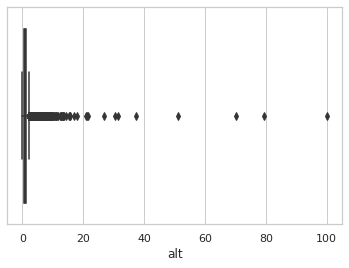

In [79]:
lower, upper = quantile_calc("alt")

Zistili sme, že máme priveľa **vychýlených hodnôt** a nemôžeme všetky vyhodiť z nášho datasetu.
Preto sme sa rozhodli pre metódu úpravy hodnôt pomocou **kvantilov** s individuálnym prístupom.

/tmp/ipykernel_18176/1311290690.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labor["alt"][x] = (data_labor["alt"][x]/(upper*25)) + upper


<AxesSubplot:xlabel='alt'>

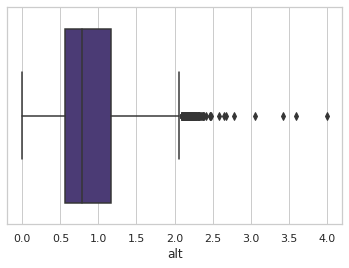

In [80]:
# 2.5 -> 2.05
# 5 -> 2.10
# 20 -> 2.40
# 100 -> 4.00

for x in data_labor.index:
    if data_labor.loc[x, "alt"] > upper:
        data_labor["alt"][x] = (data_labor["alt"][x]/(upper*25)) + upper

sns.boxplot(x=data_labor["alt"])

## HEMOGLOBÍN

Ako úpravu sme opäť zvolili pripočítanie istej hodnoty k "outlierom", aby sme ich
"shiftli" do normálneho intervalu.

4.7805
7.37889
2.59839
0.8829149999999997 11.276475000000001


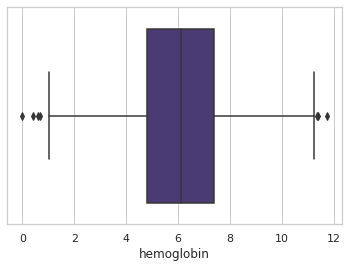

In [155]:
lower, upper = quantile_calc("hemoglobin")

/tmp/ipykernel_18176/1719076402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labor[attr][i] = data_labor[attr][i] + lower
/tmp/ipykernel_18176/1719076402.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labor[attr][i] = data_labor[attr][i] - lower


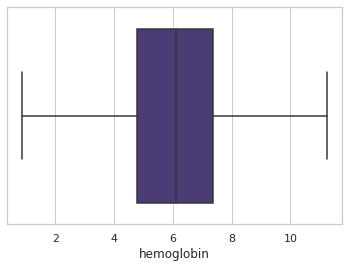

In [156]:
move_outliers(lower, upper, "hemoglobin")

## ALP

Hodnoty alpu sme nemuseli upravovať, keďže boxplot z našej funkcie nevykreslil nijakých
outlierov. Preto sme sa rozhodli daný atribút neupravovať.

31.460749999999997
78.880725
47.419975
0 150.01068750000002


(0, 150.01068750000002)

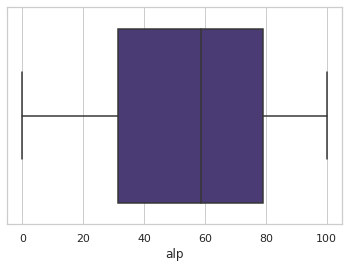

In [151]:
quantile_calc("alp")

## ER-CV

Opäť raz sme použili našu funkciu **quantile_calc()**, ktorá nám okrem
hraničných hodnôt vykreslila boxplot, v ktorom môžeme graficky odpozorovať
vymykajúce sa hodnoty er-cv atribútu.

42.5272275
59.8599
17.3326725
16.52821875 85.85890875000001


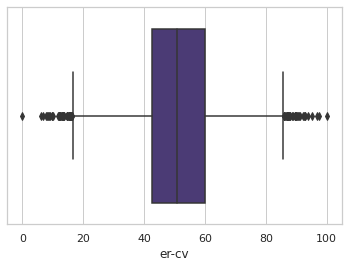

In [87]:
lower, upper = quantile_calc("er-cv")

/tmp/ipykernel_18176/2057292394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labor["er-cv"][x] = data_labor["er-cv"][x] - lower
/tmp/ipykernel_18176/2057292394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labor["er-cv"][x] = data_labor["er-cv"][x] + lower


<AxesSubplot:xlabel='er-cv'>

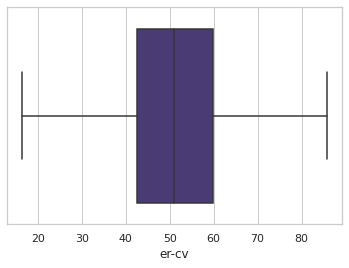

In [88]:
move_outliers(lower, upper, "er-cv")

## AST

Pri atribúte AST sme zvolili identickú taktiku ako pri atribúte er-cv.
* výpočet hraníc a vykreslenie boxplotu
* úprava outlierov pripočítaním/odpočítaním spodnej hranice

41.8184625
59.0379075
17.219445
15.989295000000002 84.867075


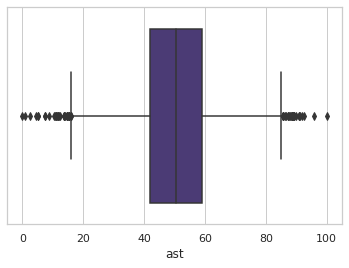

In [90]:
lower, upper = quantile_calc("ast")

/tmp/ipykernel_18176/1710326038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labor["ast"][x] = data_labor["ast"][x] - lower
/tmp/ipykernel_18176/1710326038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labor["ast"][x] = data_labor["ast"][x] + lower


<AxesSubplot:xlabel='ast'>

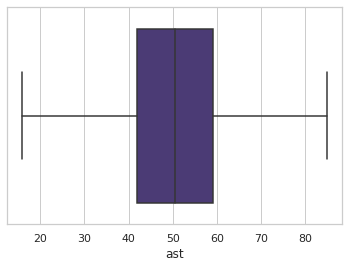

In [91]:
move_outliers(lower, upper, "ast")

In [92]:
data_labor.describe()


,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,indicator,er-cv,weight,ast,hematokrit
count,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000
mean,0.406098,6.070715,6.840748,0.936207,6.066094,5.318936,6.062830,6.082949,54.632998,0.642929,51.125632,72.421383,50.475143,6.460605
std,0.491128,1.000591,1.460582,0.519735,1.009063,1.392034,1.740366,1.007018,26.084256,0.479160,12.536947,32.166619,12.512106,1.618713
min,0.000000,2.148000,1.103640,0.000000,2.239400,0.548790,0.883889,2.587100,0.000000,0.000000,16.528219,5.046350,15.989295,1.991860
25%,0.000000,5.400250,6.036600,0.564078,5.396910,4.445485,4.780697,5.405445,31.522015,0.000000,42.527228,49.105900,41.818463,5.126325
50%,0.000000,6.071692,7.004295,0.781535,6.071800,5.120610,6.109925,6.084217,58.543195,1.000000,50.944565,71.381830,50.614025,6.751880
75%,1.000000,6.741408,7.806072,1.164230,6.732252,6.019728,7.378570,6.765375,78.873415,1.000000,59.859900,94.053502,59.037908,7.489332
max,1.000000,10.532500,12.769020,4.002013,9.767710,10.673750,11.720370,9.774760,100.000000,1.000000,85.724780,194.734070,84.846140,13.021170
